In [1]:
!pip install statsmodels
import pandas as pd
import numpy as np
from scipy  import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
cars_data = pd.read_csv('Cardetails.csv')

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Doing feature engineering

We have dropped a torque parameter


In [4]:
cars_data.drop(columns=['torque'], inplace=True)

In [5]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [6]:
cars_data.shape

(8128, 12)

# Preprocessing

## Removing NULL ChecK

In [7]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [8]:
newDataset = cars_data.dropna()

In [9]:
cars_data.shape

(8128, 12)

## Difference between old and new data set

In [10]:
newDataset.shape

(7907, 12)

In [11]:
cars_data.shape[0] - newDataset.shape[0] 

221

In [12]:
cars_data = newDataset

In [13]:
cars_data.duplicated().sum()

1189

### Printing the duplicates


In [14]:
duplicates = cars_data[cars_data.duplicated(keep=False)]

duplicates.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
32,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,4.0
36,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,5.0
37,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1591 CC,121.3 bhp,5.0
38,Datsun GO D,2016,150000,42000,Petrol,Individual,Manual,First Owner,20.63 kmpl,1198 CC,67 bhp,5.0
39,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93 kmpl,2179 CC,138.03 bhp,7.0
40,Maruti 800 Std,2012,150000,76000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,4.0
41,Jeep Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,First Owner,16.0 kmpl,1368 CC,160.77 bhp,5.0


In [15]:
cars_data.drop_duplicates(inplace=True)

In [16]:
cars_data.shape

(6718, 12)

In [17]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [18]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


# Data Analysis

In [19]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique()[:10])
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' 'Hyundai i20 Sportz Diesel'
 'Maruti Swift VXI BSIII' 'Hyundai Xcent 1.2 VTVT E Plus'
 'Maruti Wagon R LXI DUO BSIII' 'Maruti 800 DX BSII' 'Toyota Etios VXD'
 'Ford Figo Diesel Celebration Edition']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009]
Unique values of selling_price
[450000 370000 158000 225000 130000 440000  96000  45000 350000 200000]
Unique values of km_driven
[145500 120000 140000 127000  45000 175000   5000  90000 169000  68000]
Unique values of fuel
['Diesel' 'Petrol' 'LPG' 'CNG']
Unique values of seller_type
['Individual' 'Dealer' 'Trustmark Dealer']
Unique values of transmission
['Manual' 'Automatic']
Unique values of owner
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Unique values of mileage
['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20

In [20]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [21]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [22]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [23]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [24]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [25]:
len(cars_data['name'].unique())

31

In [26]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [27]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [28]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [29]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique()[:10])
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009]
Unique values of selling_price
[450000 370000 158000 225000 130000 440000  96000  45000 350000 200000]
Unique values of km_driven
[145500 120000 140000 127000  45000 175000   5000  90000 169000  68000]
Unique values of fuel
['Diesel' 'Petrol' 'LPG' 'CNG']
Unique values of seller_type
['Individual' 'Dealer' 'Trustmark Dealer']
Unique values of transmission
['Manual' 'Automatic']
Unique values of owner
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Unique values of mileage
[23.4  21.14 17.7  23.   16.1  20.14 17.3  23.59 20.   19.01]
Unique values of engine
[1248. 1498. 1497. 1396. 1298. 1197. 1061.  796. 1364. 1399.]
Unique values of max_power
[ 74.   103.52  78.    90.    88.2   81.86  57.5   37.    67.1   68.1 ]
Unique values of seats
[ 5.  4.  7.  8.  6.  9. 

In [30]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [31]:
cars_data['name'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [32]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [33]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [34]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [35]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [36]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [37]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [38]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [39]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [40]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.3 KB


In [41]:
cars_data.reset_index(inplace=True)

In [42]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [43]:
cars_data.drop(columns=['index'], inplace=True)

In [44]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique()[:10])

------------
name
[ 1  2  3  4  5  6  7  8  9 10]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009]
------------
selling_price
[450000 370000 158000 225000 130000 440000  96000  45000 350000 200000]
------------
km_driven
[145500 120000 140000 127000  45000 175000   5000  90000 169000  68000]
------------
fuel
[1 2 3 4]
------------
seller_type
[1 2 3]
------------
transmission
[1 2]
------------
owner
[1 2 3 4 5]
------------
mileage
[23.4  21.14 17.7  23.   16.1  20.14 17.3  23.59 20.   19.01]
------------
engine
[1248. 1498. 1497. 1396. 1298. 1197. 1061.  796. 1364. 1399.]
------------
max_power
[ 74.   103.52  78.    90.    88.2   81.86  57.5   37.    67.1   68.1 ]
------------
seats
[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]


In [45]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [46]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state = 20)

# Plot graph for this

In [48]:
def plot_actual_vs_predicted(y_values, y2_values, title='Train Y and Test Y', label1 = 'Lable 1', label2 = 'Label 2'):
  
    
    plt.figure(figsize=(10, 6))
    indices = range(len(y_values))
    indices_2 = range(len(y2_values))
    plt.scatter(indices, y_values, alpha=0.5, c='red', marker='x', label=label1)
    plt.scatter(indices_2, y2_values, alpha=0.5, c='blue', marker='o', label=label2)
    
    plt.title(title)
    plt.xlabel('Indices')
    plt.ylabel('Prices')
    
    # Drawing a reference line for perfect predictions
    min_val = min(y_test.min(), y_values.min())
    max_val = max(y_test.max(), y_values.max())
    #plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=4)
    
    plt.legend()
    plt.show()


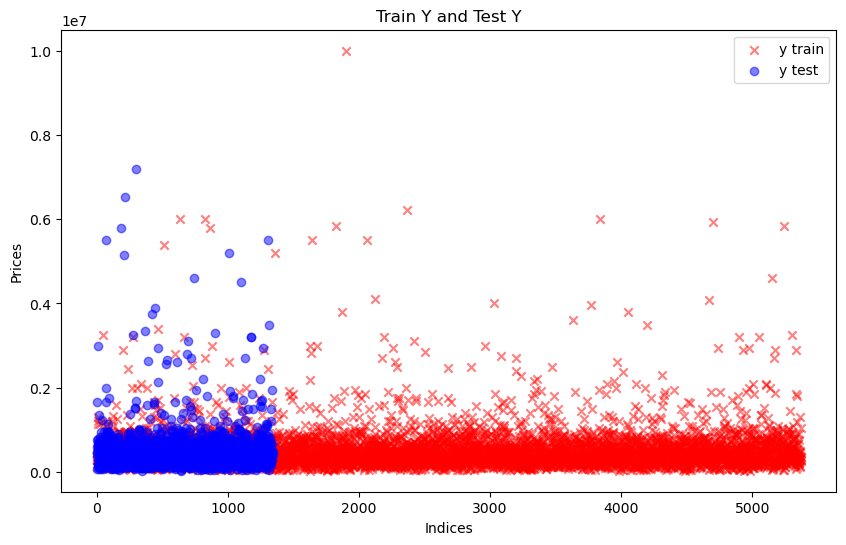

In [49]:
plot_actual_vs_predicted(y_train, y_test, label1= 'y train', label2 = 'y test')

# Linear Regression model Creation
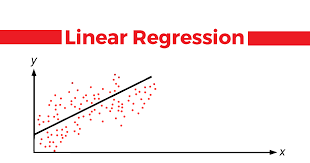

In [50]:
LR_model1 = LinearRegression()

# Training Model 1

In [51]:
LR_model1.fit(x_train, y_train)

LinearRegression()

In [52]:
predict_train = LR_model1.predict(x_train)

In [53]:
r_squared_train=LR_model1.score(x_train, y_train)

In [54]:
print(r_squared_train)

0.6188387786884378


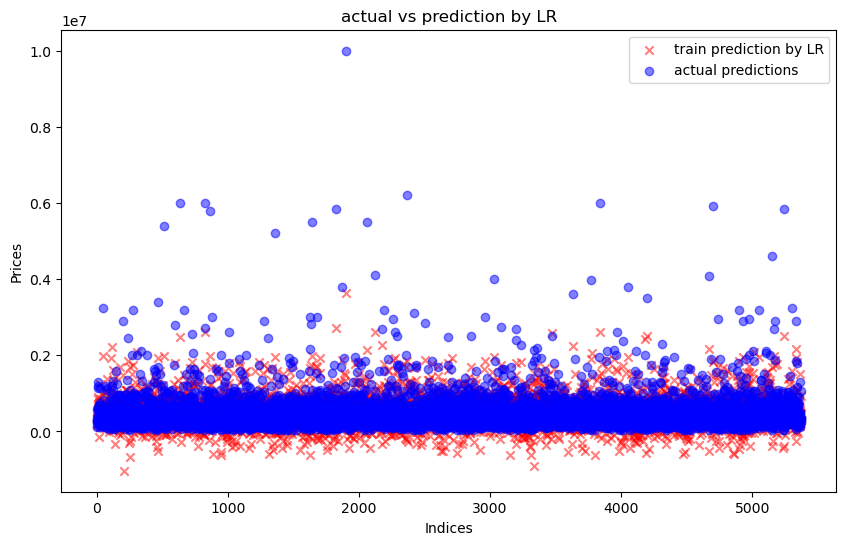

In [55]:
plot_actual_vs_predicted(predict_train, y_train, 'actual vs prediction by LR', label1= 'train prediction by LR',
                        label2= 'actual predictions')

We can clearly see that errors are present in linear regression model

## Result in train set of linear  Regression is 61%



## Lets improve training performance using new column as age instead of Year.

In [56]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0


In [57]:
from datetime import datetime


In [58]:
cars_data['age'] = datetime.now().year - cars_data['year']

In [59]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,10
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,10
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,18
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,14
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,17


In [60]:
cars_data.drop(columns=['year'], inplace=True)

In [61]:
cars_data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,1,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,10
1,2,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,10
2,3,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,18
3,4,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,14
4,1,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,17


In [62]:
def createModel(x_train, y_train):
    newModel = LinearRegression()
    newModel.fit(x_train, y_train)
    predict_train = newModel.predict(x_train)
    error =newModel.score(x_train, y_train)
    return newModel, error

In [63]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [64]:
x_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6486,4,2018,20000,2,1,1,2,18.90,1197.0,81.86,5.0
1422,9,2013,120000,1,1,1,1,22.30,1248.0,74.00,5.0
1969,9,2012,90000,1,1,1,1,23.57,1396.0,70.00,5.0
586,1,2019,25000,2,1,1,1,23.95,998.0,67.05,5.0
2557,1,2012,60000,2,1,1,1,19.00,998.0,66.10,5.0


In [65]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state = 20)

In [66]:
LR_model2, error = createModel(x_train, y_train)

In [67]:
print("Coefficients:", LR_model2.coef_)

Coefficients: [-5.19588090e+02 -5.22777224e-01 -3.06208280e+04  9.59783623e+04
  2.71791813e+05 -1.36376721e+04  6.52365331e+03  9.42049696e+01
  8.21769805e+03 -2.10931615e+03 -3.45020936e+04]


In [68]:
error

0.6188387786884408

## No Change in Accuracy (R square)


- No improvement in accuracy by creating new Column 'Age'.

# Feature Engineering (Correlation)

In [69]:
import seaborn as sns

In [70]:
corr_matrix = cars_data[['name', 'age', 'selling_price', 'km_driven', 'fuel', 'seller_type',
                         'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']].corr()


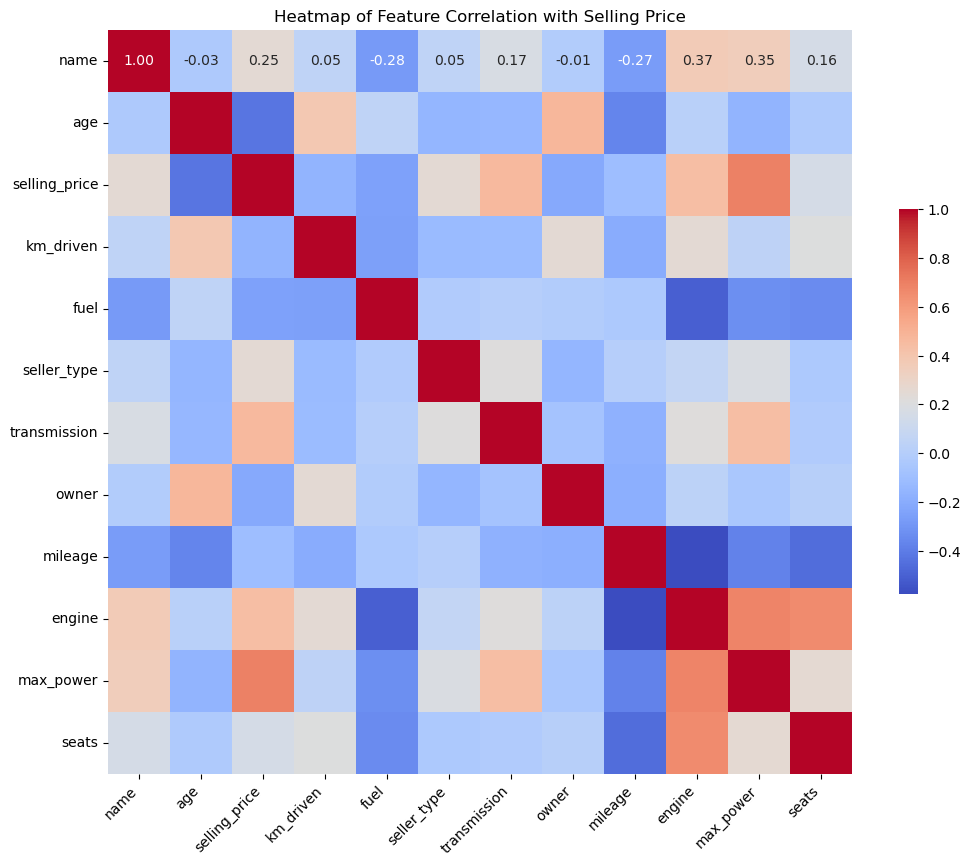

In [71]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Adjust layout to make room for the x-labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Title
plt.title('Heatmap of Feature Correlation with Selling Price')

# Show plot
plt.show()

# Lets train model with only the features which has correlation of above .4 and less than -.4

Which are
- max_power
- engine
- transmission
- age

In [72]:
quad_ds = cars_data[['max_power','engine','transmission','age']]
quad_op =cars_data['selling_price']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(quad_ds, quad_op, test_size=0.2, random_state = 20)

In [74]:
model3, error = createModel(x_train, y_train)

In [75]:
print("Coefficients:", model3.coef_)


Coefficients: [ 8.41528864e+03  5.47850033e+01  2.82506746e+05 -4.21879380e+04]


In [76]:
x_train.head()

,max_power,engine,transmission,age
6486,81.86,1197.0,1,6
1422,74.00,1248.0,1,11
1969,70.00,1396.0,1,12
586,67.05,998.0,1,5
2557,66.10,998.0,1,12


In [77]:
error

0.6083214834281598

# Random Forest

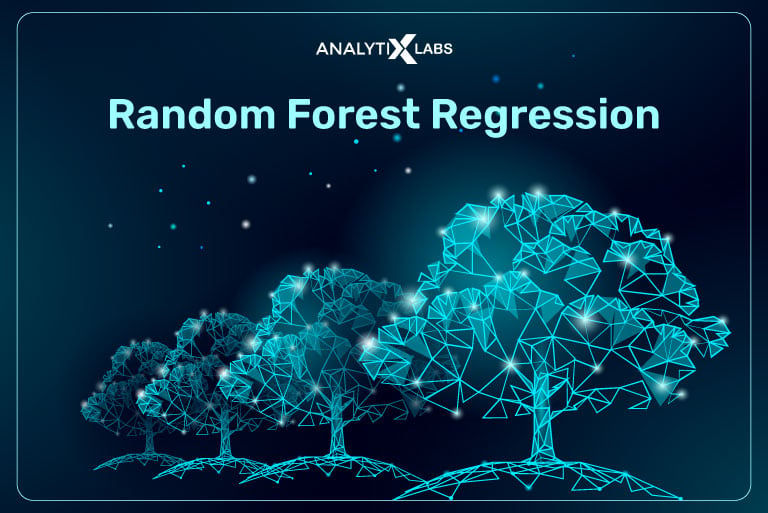

In [78]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state = 20)

In [79]:
from sklearn.ensemble import RandomForestRegressor


In [80]:
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=42)

In [81]:
x_train.head()

,name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6486,4,20000,2,1,1,2,18.90,1197.0,81.86,5.0,6
1422,9,120000,1,1,1,1,22.30,1248.0,74.00,5.0,11
1969,9,90000,1,1,1,1,23.57,1396.0,70.00,5.0,12
586,1,25000,2,1,1,1,23.95,998.0,67.05,5.0,5
2557,1,60000,2,1,1,1,19.00,998.0,66.10,5.0,12


In [82]:
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [83]:
# Predict on the test data
y_pred_test = random_forest_model.predict(x_train)

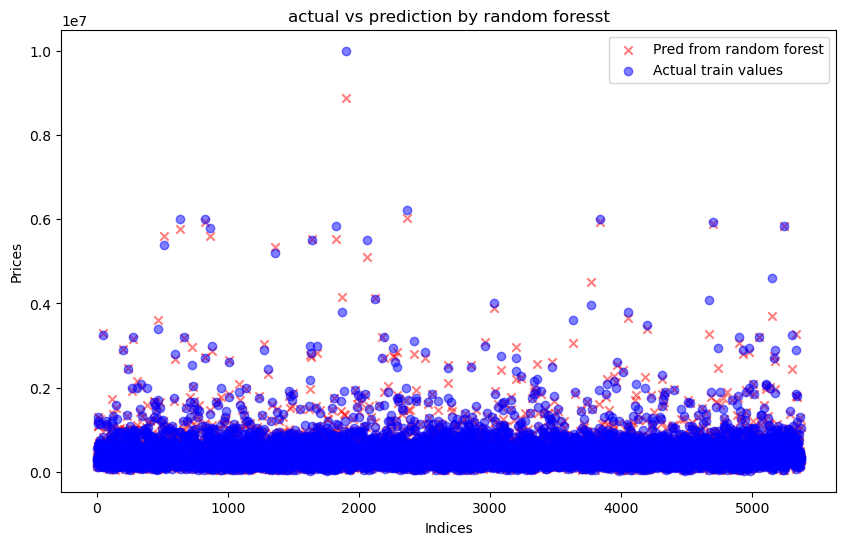

In [84]:
plot_actual_vs_predicted(y_pred_test, y_train, 'actual vs prediction by random foresst', label1= 'Pred from random forest',
                        label2= 'Actual train values')

In [85]:
from sklearn.metrics import r2_score, mean_squared_error


In [86]:
r2_test = r2_score(y_train, y_pred_test)
print(r2_test)

0.9853359475300117


### COOL, we got 98.53% accuracy(R Square) on training data with Random Forest Model 1


In [87]:
y_test_pred = random_forest_model.predict(x_test)

In [88]:
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)

0.9063922561648808


### we got 90% accuracy(R Square) on test data with Random Forest Model 1

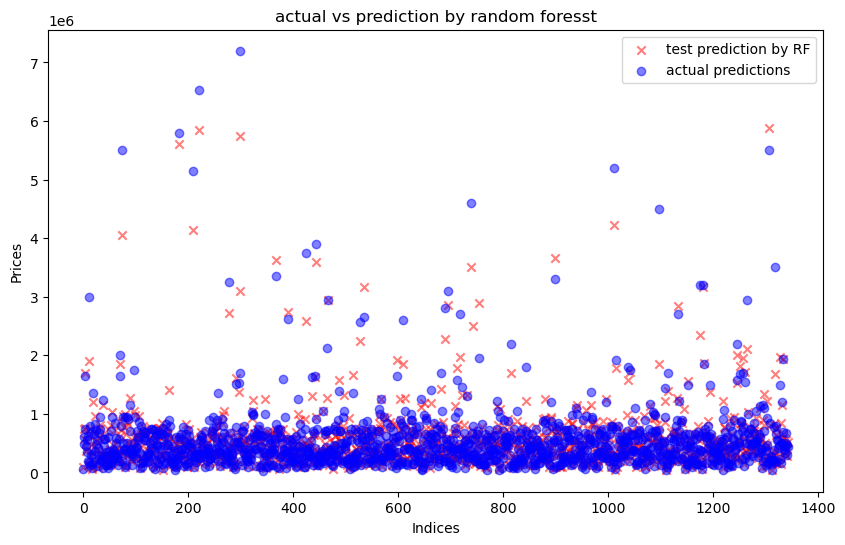

In [89]:
plot_actual_vs_predicted(y_test_pred, y_test, 'actual vs prediction by random foresst', label1= 'test prediction by RF',
                        label2= 'actual predictions')

In [90]:
x_train.head()

,name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6486,4,20000,2,1,1,2,18.90,1197.0,81.86,5.0,6
1422,9,120000,1,1,1,1,22.30,1248.0,74.00,5.0,11
1969,9,90000,1,1,1,1,23.57,1396.0,70.00,5.0,12
586,1,25000,2,1,1,1,23.95,998.0,67.05,5.0,5
2557,1,60000,2,1,1,1,19.00,998.0,66.10,5.0,12


## Let us see random forest with 4 features 

max_power, 
engin, 
transmissi, n
age

In [91]:
x_train, x_test, y_train, y_test = train_test_split(quad_ds, quad_op, test_size=0.2, random_state = 20)

In [92]:
rf_Model2 = RandomForestRegressor(n_estimators=10, random_state=42)

In [93]:
rf_Model2.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [94]:
# Predict on the test data
y_pred_test = rf_Model2.predict(x_train)

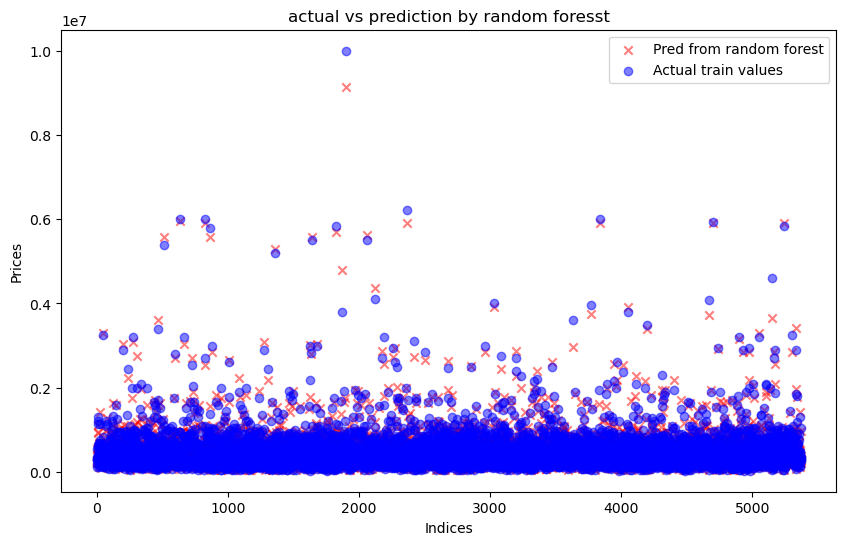

In [95]:
plot_actual_vs_predicted(y_pred_test, y_train, 'actual vs prediction by random foresst', label1= 'Pred from random forest',
                        label2= 'Actual train values')

In [96]:
r2_test = r2_score(y_train, y_pred_test)
print(r2_test)

0.970235727007407


### we got 97.02% accuracy(R Square) on training data with Random Forest Model 2

In [97]:
y_pred_test = rf_Model2.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)

0.9063922561648808


### we got 90% accuracy(R Square) on test data with Random Forest Model 2

# Observation - 
- With 4 features we are getting 97% accuracy (R square) 
- with all 11 features we are getting 98% accuracy (R square)


### so we can say that above 4 features are more significant than others.


# Prediction Time

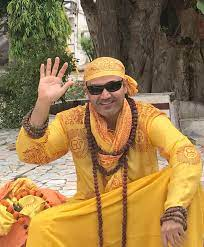

In [98]:
 input_data_model = pd.DataFrame(
   [[5,12000,1,1,1,1,12.99,2494.0,100.6,5.0,6]],
   columns=['name','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats' ,'age'])

In [99]:
input_data_model

,name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,5,12000,1,1,1,1,12.99,2494.0,100.6,5.0,6


### Prediction by Linear Regression

In [100]:
predict_LR = LR_model2.predict(input_data_model)

In [101]:
print("Predicted price by LR:",predict_LR)

Predicted price by LR: [859067.64171438]


8.59 lacs by LR

### Prediction by Random forest with all variable

In [102]:
predict_rf_1= random_forest_model.predict(input_data_model)

In [103]:
print("Predicted price by LR:",predict_rf_1)

Predicted price by LR: [913999.8]


# Difference in Selling Price Btw LR and Random Forest Model:

In [104]:
Diff= predict_rf_1 - predict_LR

In [105]:
print(Diff)

[54932.15828562]


- Difference is 54932.15828562